# Module 00: Data Pre-Processing & Feature Selection

## Feature Importance Ranking

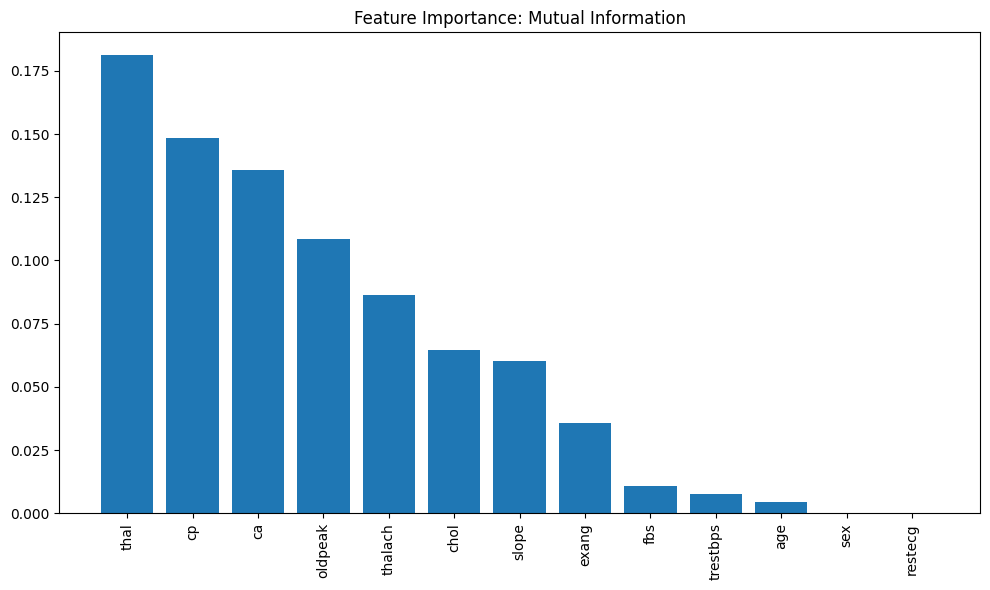


Mutual Information:
      Feature  Mutual Information
12      thal            0.181157
2         cp            0.148423
11        ca            0.135603
9    oldpeak            0.108561
7    thalach            0.086399
4       chol            0.064408
10     slope            0.060386
8      exang            0.035530
5        fbs            0.010773
3   trestbps            0.007744
0        age            0.004367
1        sex            0.000000
6    restecg            0.000000


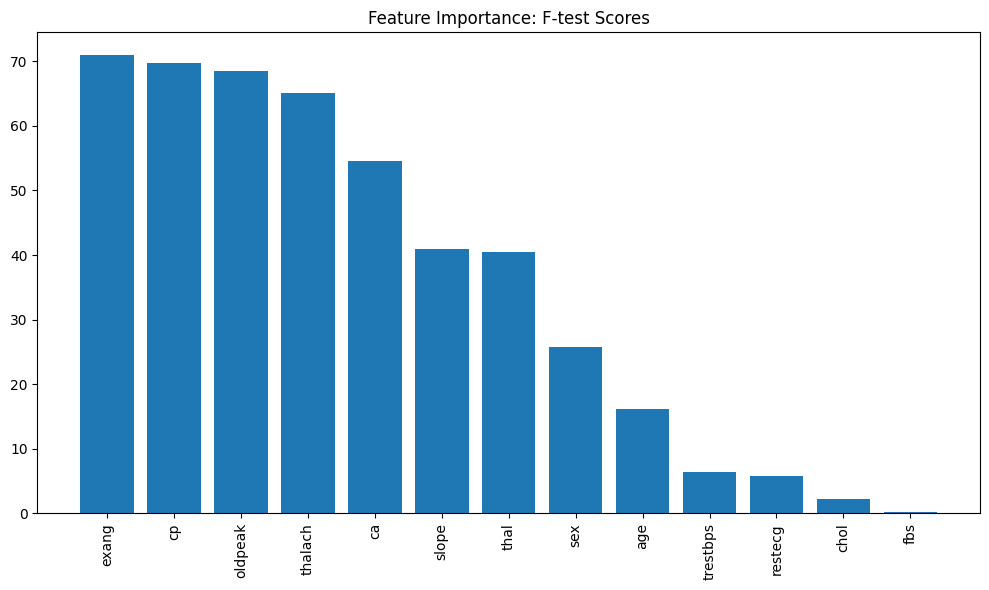


F-test Scores:
      Feature  F-test Score
8      exang     70.952438
2         cp     69.772271
9    oldpeak     68.551439
7    thalach     65.120104
11        ca     54.559834
10     slope     40.902071
12      thal     40.407696
1        sex     25.792191
0        age     16.116700
3   trestbps      6.458169
6    restecg      5.777209
4       chol      2.202983
5        fbs      0.236942


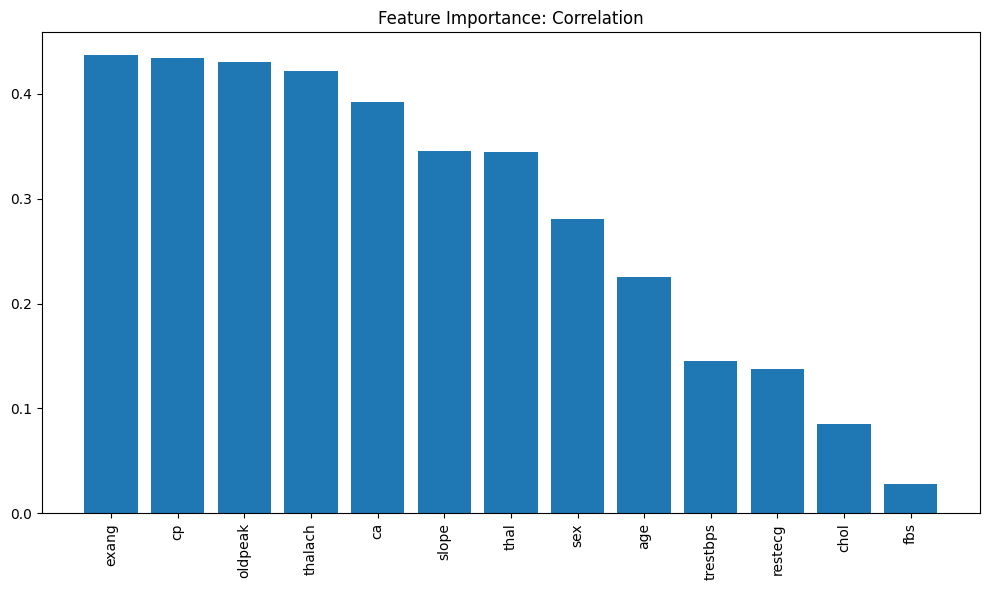


Correlation:
      Feature  Correlation
8      exang     0.436757
2         cp     0.433798
9    oldpeak     0.430696
7    thalach     0.421741
11        ca     0.391724
10     slope     0.345877
12      thal     0.344029
1        sex     0.280937
0        age     0.225439
3   trestbps     0.144931
6    restecg     0.137230
4       chol     0.085239
5        fbs     0.028046


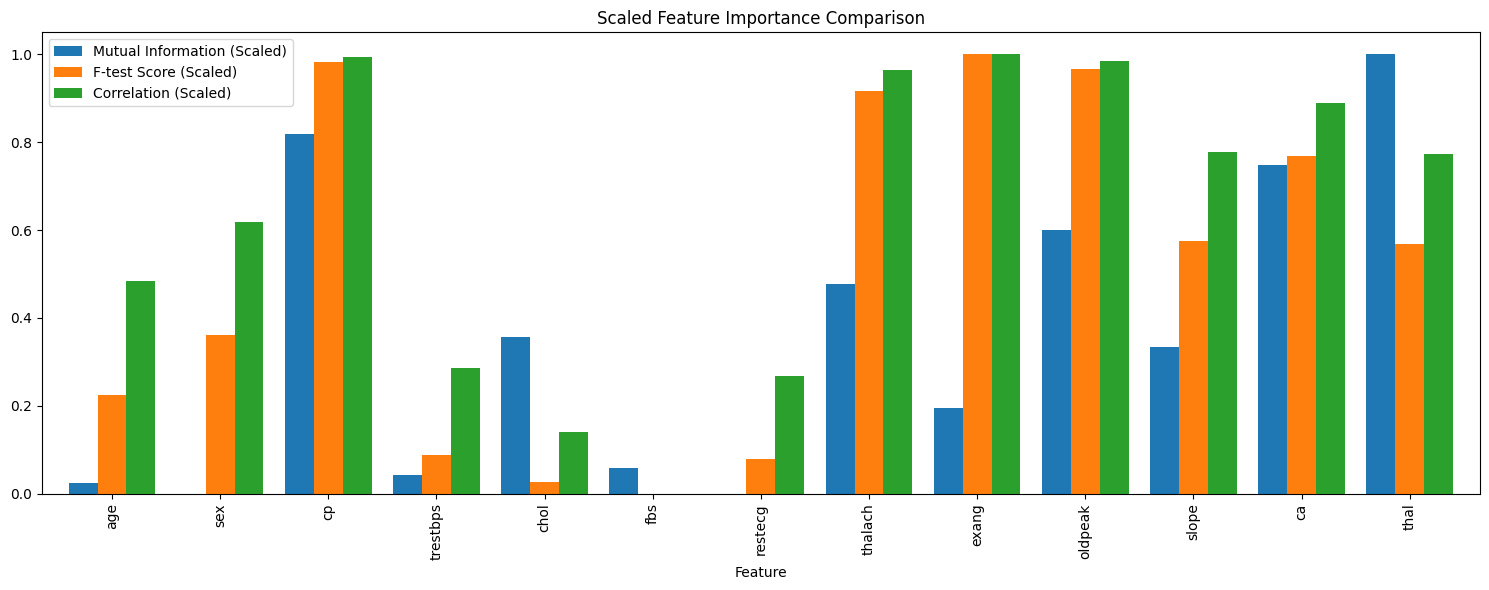

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif, f_classif
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load data and prepare features
data = pd.read_csv('data.csv')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Calculate all metrics at once
metrics = {
    'Mutual Information': mutual_info_classif(X, y),
    'F-test Score': f_classif(X, y)[0],
    'Correlation': data.corrwith(y).abs().drop(y.name).values
}

# Create unified DataFrame
feature_importance = pd.DataFrame({'Feature': X.columns})
for name, values in metrics.items():
    feature_importance[name] = values

# Generic plotting function
def plot_metric(metric, title):
    df = feature_importance.sort_values(metric, ascending=False)
    plt.figure(figsize=(10, 6))
    plt.bar(df['Feature'], df[metric])
    plt.title(f'Feature Importance: {title}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    return df

# Plot and display results for each metric
for metric, title in [('Mutual Information', 'Mutual Information'),
                      ('F-test Score', 'F-test Scores'),
                      ('Correlation', 'Correlation')]:
    sorted_df = plot_metric(metric, title)
    print(f"\n{title}:\n", sorted_df[['Feature', metric]])

# Combined comparison plot
scaler = MinMaxScaler()
scaled = pd.DataFrame(scaler.fit_transform(feature_importance.iloc[:, 1:]),
                      columns=[f"{col} (Scaled)" for col in metrics],
                      index=feature_importance.Feature)

ax = scaled.plot.bar(figsize=(15, 6), width=0.8)
plt.title('Scaled Feature Importance Comparison')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Outliers for age:
No outliers found


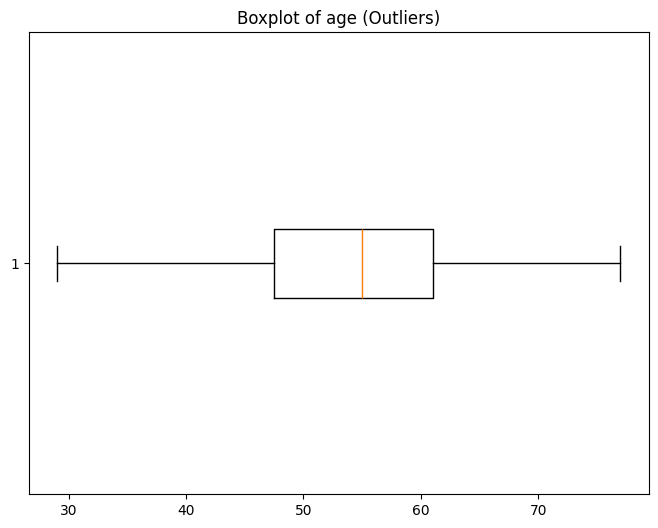

Outliers for sex:
No outliers found


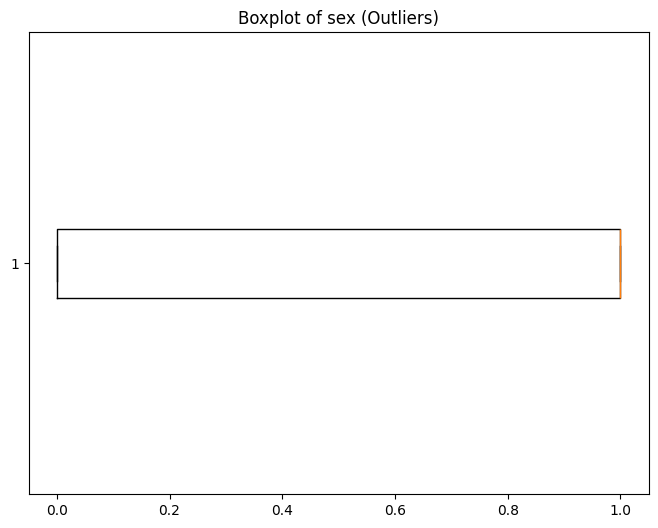

Outliers for cp:
No outliers found


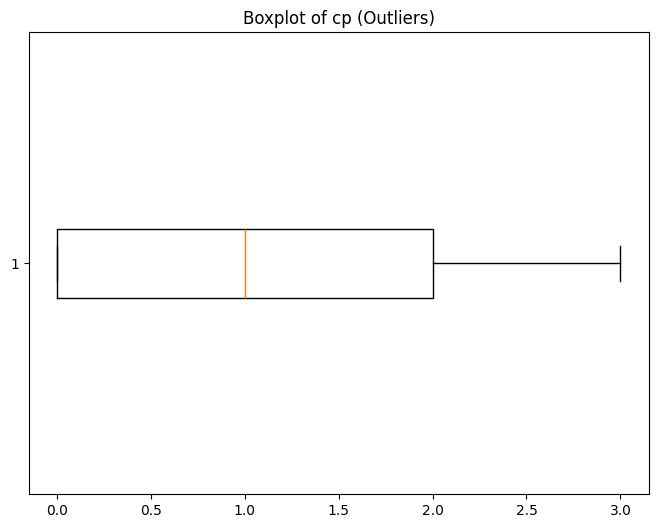

Outliers for trestbps:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
8     52    1   2       172   199    1        1      162      0      0.5   
101   59    1   3       178   270    0        0      145      0      4.2   
110   64    0   0       180   325    0        1      154      1      0.0   
203   68    1   2       180   274    1        0      150      1      1.6   
223   56    0   0       200   288    1        0      133      1      4.0   
241   59    0   0       174   249    0        1      143      1      0.0   
248   54    1   1       192   283    0        0      195      0      0.0   
260   66    0   0       178   228    1        1      165      1      1.0   
266   55    0   0       180   327    0        2      117      1      3.4   

     slope  ca  thal  target  
8        2   0     3       1  
101      0   0     3       1  
110      2   0     2       1  
203      1   0     3       0  
223      0   2     3       0  
241      1   0     2       0  

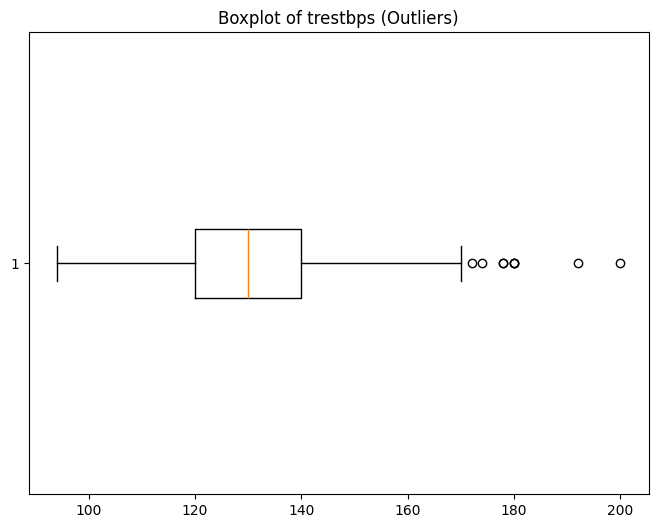

Outliers for chol:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
28    65    0   2       140   417    1        0      157      0      0.8   
85    67    0   2       115   564    0        0      160      0      1.6   
96    62    0   0       140   394    0        0      157      0      1.2   
220   63    0   0       150   407    0        0      154      0      4.0   
246   56    0   0       134   409    0        0      150      1      1.9   

     slope  ca  thal  target  
28       2   1     2       1  
85       1   0     3       1  
96       1   0     2       1  
220      1   3     3       0  
246      1   2     3       0  


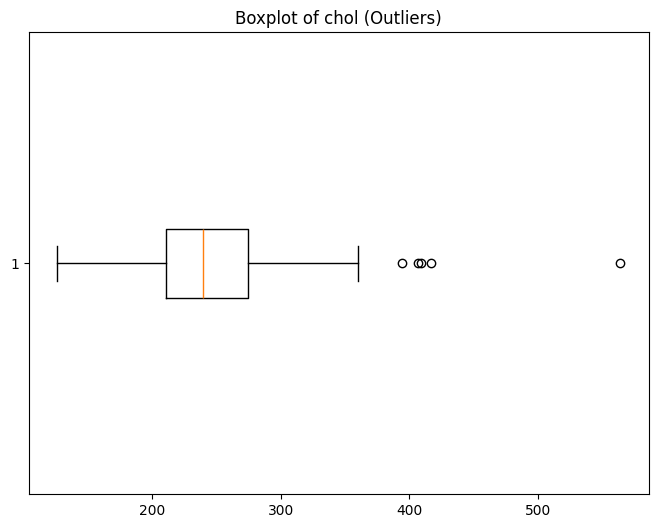

Outliers for fbs:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
8     52    1   2       172   199    1        1      162      0      0.5   
14    58    0   3       150   283    1        0      162      0      1.0   
23    61    1   2       150   243    1        1      137      1      1.0   
26    59    1   2       150   212    1        1      157      0      1.6   
28    65    0   2       140   417    1        0      157      0      0.8   
29    53    1   2       130   197    1        0      152      0      1.2   
36    54    0   2       135   304    1        1      170      0      0.0   
60    71    0   2       110   265    1        0      130      0      0.0   
64    58    1   2       140   211    1        0      165      0      0.0   
76    51    1   2       125   245    1        0      166      0      2.4   
78    52    1   1       128   205    1        1      184      0      0

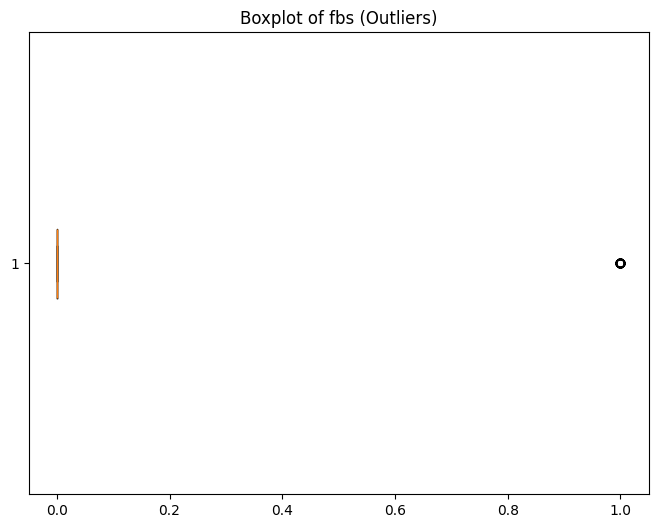

Outliers for restecg:
No outliers found


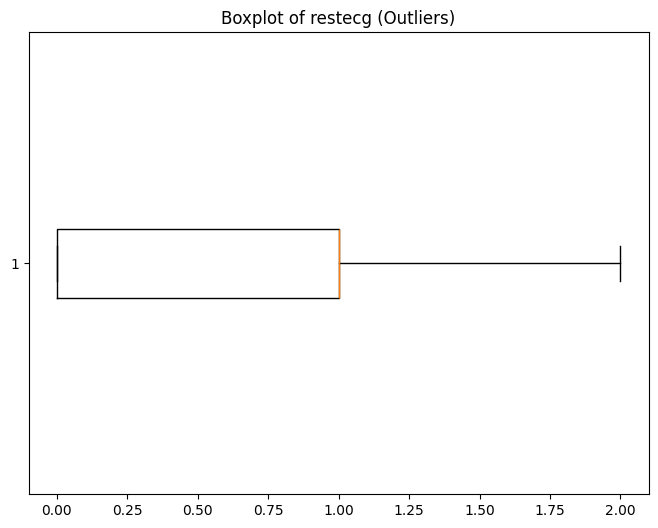

Outliers for thalach:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
272   67    1   0       120   237    0        1       71      0      1.0   

     slope  ca  thal  target  
272      1   0     2       0  


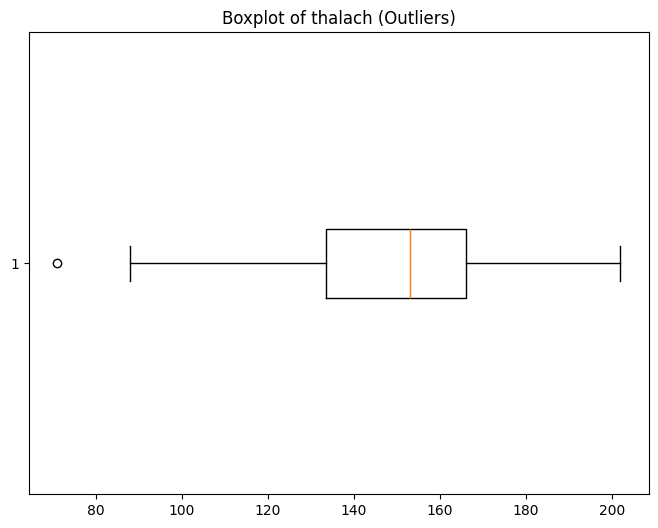

Outliers for exang:
No outliers found


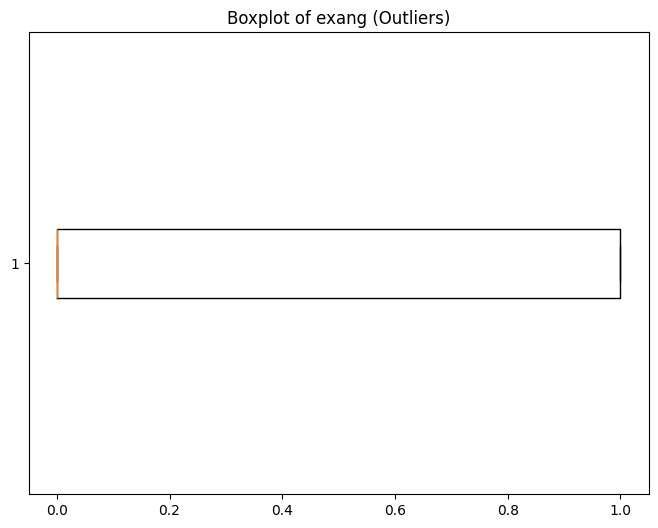

Outliers for oldpeak:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
101   59    1   3       178   270    0        0      145      0      4.2   
204   62    0   0       160   164    0        0      145      0      6.2   
221   55    1   0       140   217    0        1      111      1      5.6   
250   51    1   0       140   298    0        1      122      1      4.2   
291   58    1   0       114   318    0        2      140      0      4.4   

     slope  ca  thal  target  
101      0   0     3       1  
204      0   3     3       0  
221      0   0     3       0  
250      1   3     3       0  
291      0   3     1       0  


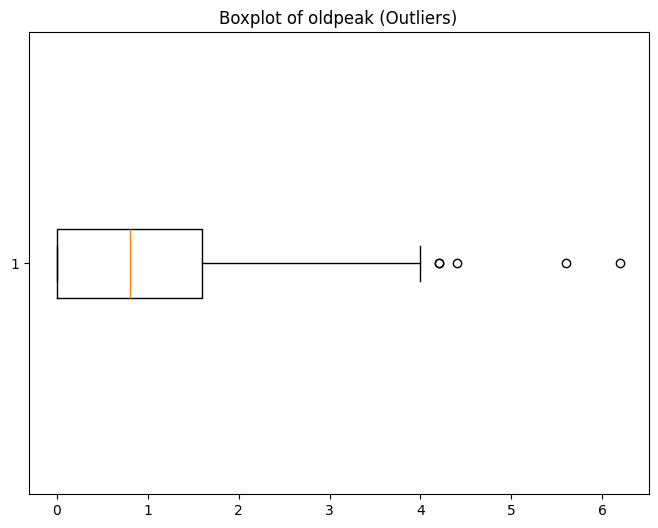

Outliers for slope:
No outliers found


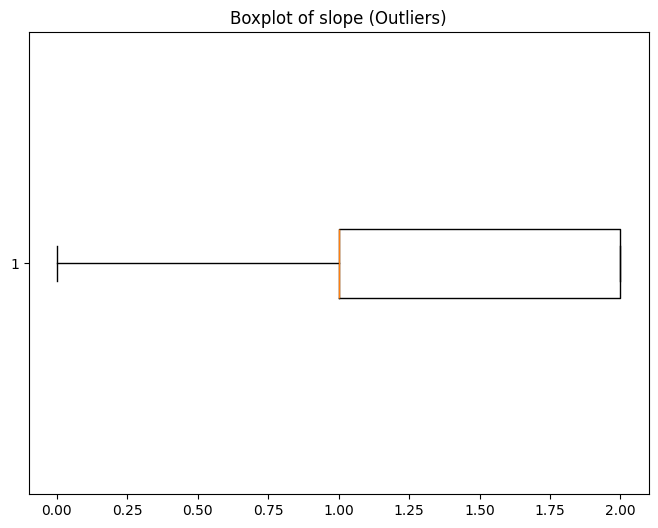

Outliers for ca:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
52    62    1   2       130   231    0        1      146      0      1.8   
92    52    1   2       138   223    0        1      169      0      0.0   
97    52    1   0       108   233    1        1      147      0      0.1   
99    53    1   2       130   246    1        0      173      0      0.0   
158   58    1   1       125   220    0        1      144      0      0.4   
163   38    1   2       138   175    0        1      173      0      0.0   
164   38    1   2       138   175    0        1      173      0      0.0   
165   67    1   0       160   286    0        0      108      1      1.5   
181   65    0   0       150   225    0        0      114      0      1.0   
191   58    1   0       128   216    0        0      131      1      2.2   
204   62    0   0       160   164    0        0      145      0      6.2   
208   49    1   2       120   188    0        1      139      0      2.

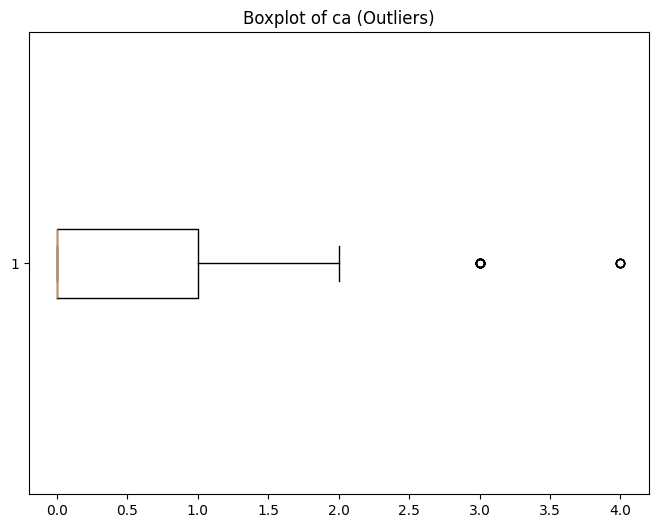

Outliers for thal:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
48    53    0   2       128   216    0        0      115      0      0.0   
281   52    1   0       128   204    1        1      156      1      1.0   

     slope  ca  thal  target  
48       2   0     0       1  
281      1   0     0       0  


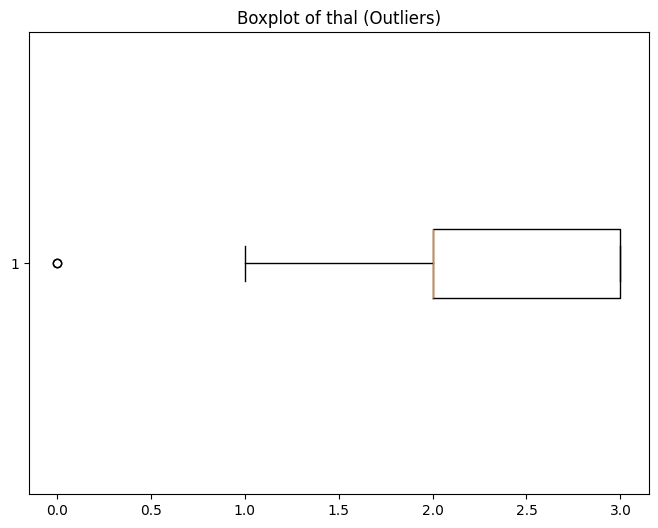

Outliers for target:
No outliers found


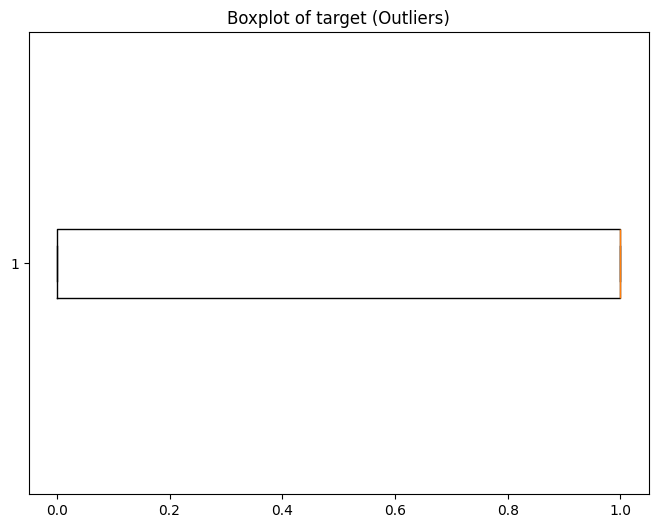

In [ ]:
# prompt: for the data set help e check for outliers

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' DataFrame is already loaded as in the previous code

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers


# Loop through columns of the dataset and detect outliers using IQR
for column in data.columns:
    outliers = detect_outliers_iqr(data, column)
    print(f"Outliers for {column}:")
    if not outliers.empty:
        print(outliers)
    else:
        print("No outliers found")

    #Visualize Outliers
    plt.figure(figsize=(8, 6))
    plt.boxplot(data[column], vert=False)  # Horizontal boxplot
    plt.title(f"Boxplot of {column} (Outliers)")
    plt.show()


## Dimensionality Reduction using PCA

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load your data
data = pd.read_csv('data.csv')

# Standardize features
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data.drop('target',axis=1))

# Apply PCA
pca = PCA(n_components=2)  # Example with 2 components
principal_components = pca.fit_transform(standardized_data)

# Get the loadings (coefficients) for each feature in each component
loadings = pca.components_

# Select features based on loadings
# For example, select features with the highest absolute loading in the first component
feature_importances = np.abs(loadings[0])
top_features = np.argsort(feature_importances)[::-1][:8]  # Select top 5 features

# Use these original features for your model
selected_features = data.iloc[:, top_features]

selected_features

,oldpeak,thalach,slope,exang,age,cp,ca,thal
0,2.3,150,0,0,63,3,0,1
1,3.5,187,0,0,37,2,0,2
2,1.4,172,2,0,41,1,0,2
3,0.8,178,2,0,56,1,0,2
4,0.6,163,2,1,57,0,0,2
...,...,...,...,...,...,...,...,...
298,0.2,123,1,1,57,0,0,3
299,1.2,132,1,0,45,3,0,3
300,3.4,141,1,0,68,0,2,3
301,1.2,115,1,1,57,0,1,3


Wrapper Methods

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# Load the dataset
data = pd.read_csv('data.csv')

# Separate features and target
X = data.drop(columns=['target'])
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize a Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Use Recursive Feature Elimination (RFE) for Wrapper Method
rfe = RFE(estimator=model, n_features_to_select=6)  # Selecting top 6 features
rfe.fit(X_train, y_train)

# Get the selected features
selected_features_wrapper = X.columns[rfe.support_]
print("Selected features using Wrapper Method:", selected_features_wrapper.tolist())


Selected features using Wrapper Method: ['age', 'cp', 'thalach', 'oldpeak', 'ca', 'thal']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE

# Load the dataset
data = pd.read_csv('data.csv')

# Separate features and target
X = data.drop(columns=['target'])
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "XGBoost Classifier": XGBClassifier(random_state=42),
    "Logistic Regression Classifier": LogisticRegression(random_state=42, max_iter=1000),

}

# Perform RFE for each model
for model_name, model in models.items():
    rfe = RFE(estimator=model, n_features_to_select=6)  # Selecting top 6 features
    rfe.fit(X_train, y_train)

    # Get the selected features
    selected_features = X.columns[rfe.support_]
    print(f"Selected features using {model_name} Wrapper Method:", selected_features.tolist())


Selected features using Decision Tree Classifier Wrapper Method: ['age', 'cp', 'thalach', 'oldpeak', 'ca', 'thal']
Selected features using XGBoost Classifier Wrapper Method: ['cp', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
Selected features using Logistic Regression Classifier Wrapper Method: ['sex', 'cp', 'exang', 'slope', 'ca', 'thal']


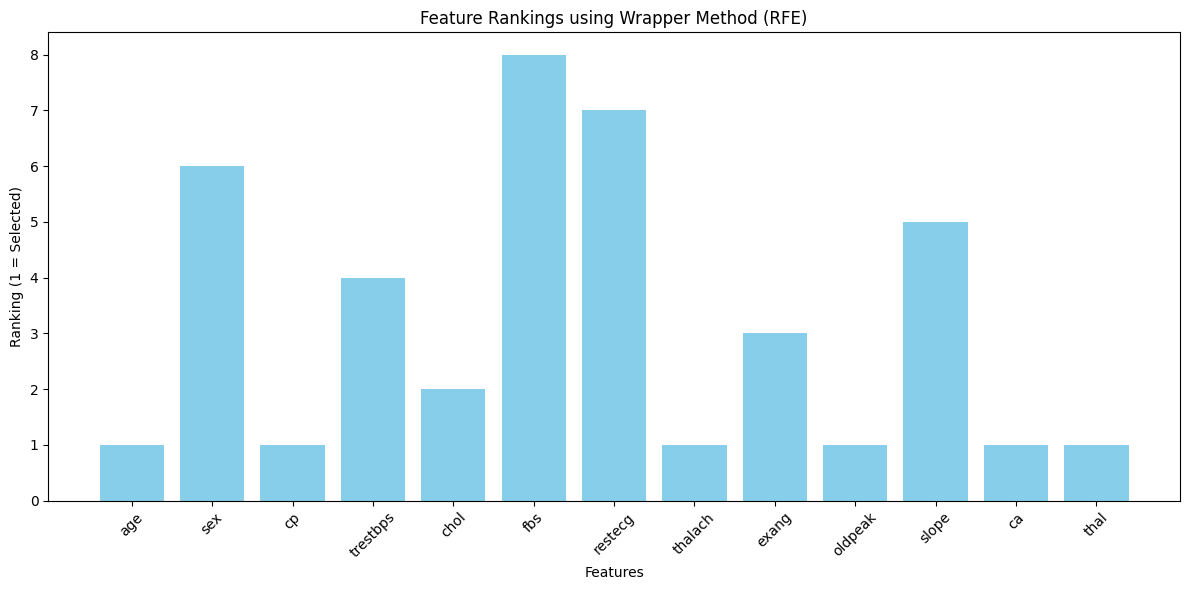

In [ ]:
# Plot feature rankings
import matplotlib.pyplot as plt
feature_ranking = rfe.ranking_
plt.figure(figsize=(12, 6))
plt.bar(X.columns, feature_ranking, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Ranking (1 = Selected)')
plt.title('Feature Rankings using Wrapper Method (RFE)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Embedded methods

Selected features using Embedded Method: ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']


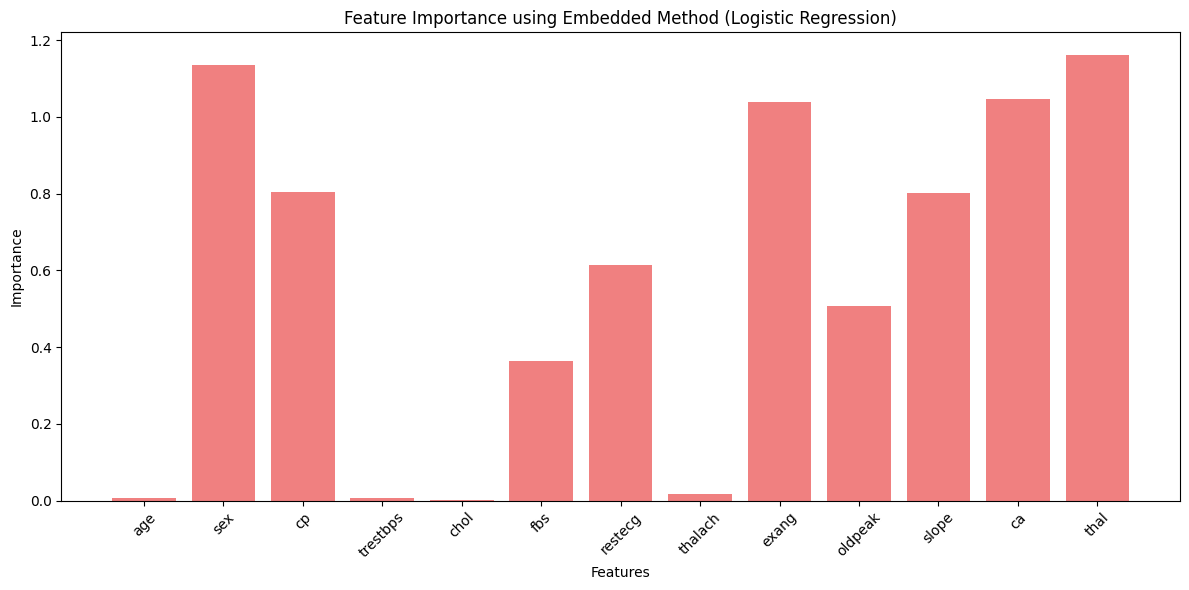

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Initialize a Logistic Regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

# Use SelectFromModel for Embedded Method
sfm = SelectFromModel(estimator=logistic_model)
sfm.fit(X_train, y_train)

# Get the selected features
selected_features_embedded = X.columns[sfm.get_support()]
print("Selected features using Embedded Method:", selected_features_embedded.tolist())

# Plot feature importance (absolute values of coefficients)
importance = abs(sfm.estimator_.coef_[0])  # Get absolute values of coefficients
plt.figure(figsize=(12, 6))
plt.bar(X.columns, importance, color='lightcoral')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance using Embedded Method (Logistic Regression)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Feature Importance using Permutation with KNN:
Feature: age, Score: 0.02547
Feature: sex, Score: 0.00000
Feature: cp, Score: 0.00377
Feature: trestbps, Score: 0.09151
Feature: chol, Score: 0.11509
Feature: fbs, Score: 0.00000
Feature: restecg, Score: 0.00000
Feature: thalach, Score: 0.17264
Feature: exang, Score: -0.00377
Feature: oldpeak, Score: -0.00283
Feature: slope, Score: 0.00000
Feature: ca, Score: 0.00189
Feature: thal, Score: -0.00094


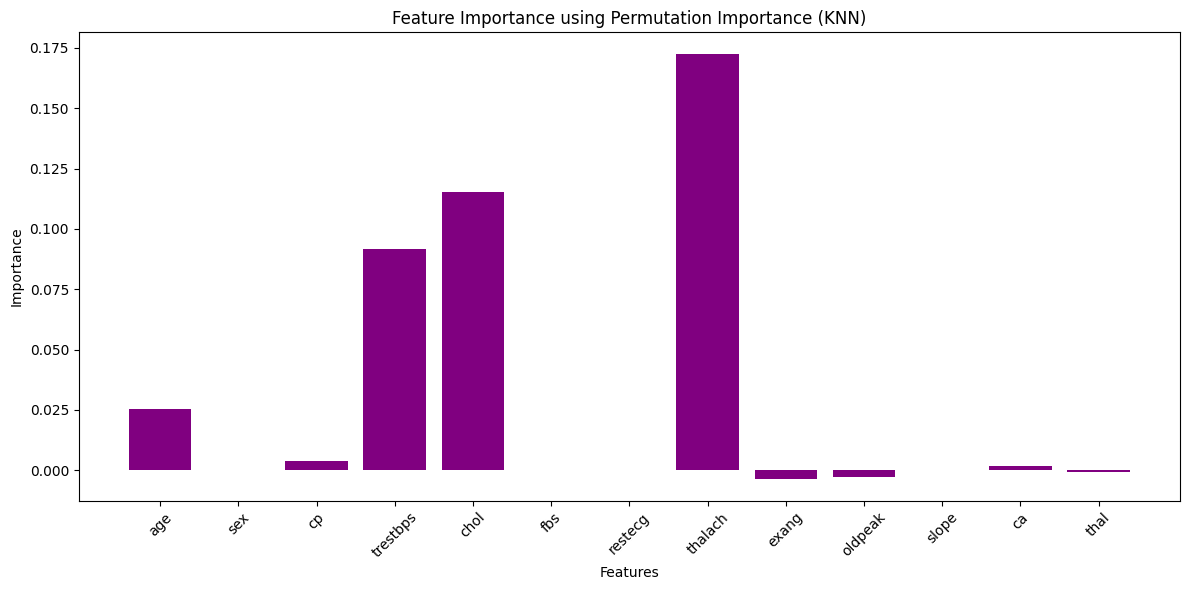

In [ ]:
from sklearn.inspection import permutation_importance

# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Calculate permutation importance
perm_importance = permutation_importance(knn_model, X_train, y_train, scoring='accuracy')

# Get feature importance scores
importance_knn = perm_importance.importances_mean

# Print and plot the importance scores
print("Feature Importance using Permutation with KNN:")
for i in range(len(importance_knn)):
    print(f"Feature: {X.columns[i]}, Score: {importance_knn[i]:.5f}")

plt.figure(figsize=(12, 6))
plt.bar(X.columns, importance_knn, color='purple')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance using Permutation Importance (KNN)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
